In [2]:
#Load the Data
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pickle

# 載入 IMDB 數據集，限制詞彙表大小為 5000 個單詞
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)
#num_words 代表我們只取出現頻率最高的前 5000 個單詞，低頻單詞將被忽略

# 將數據存儲到 pkl 文件中
with open('imdb_mini.pkl', 'wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test), f)

print("IMDB 數據集已經存儲到 imdb_mini.pkl 文件中。")
print("訓練集樣本數量:", len(X_train))
print("測試集樣本數量:", len(X_test))

# 0 為 負面評論，1 為正面評論


17464789/17464789 [==============================] - 0s 0us/step
IMDB 數據集已經存儲到 imdb_mini.pkl 文件中。
訓練集樣本數量: 25000
測試集樣本數量: 25000


In [3]:
#Review Tokenization and Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Set the maximum review length
#這一步是為了將每條評論的長度統一，不足的補 0，超出的截斷
max_length = 500

#Pad sequence
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding = 'post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding = 'post')

In [4]:
#Example of a processed review
print('Review ( Tokenized )')
print(X_train_padded[0])

#Corresponding label
print('Label')
print(y_train[0])

Review ( Tokenized )
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    5  144   30    2   18   51   36   28  224 

In [5]:
#Mapping Words to Indices
from tensorflow.keras.datasets import imdb

#Retrieve the word index
word_index = imdb.get_word_index()

#Adjust the index
word_index = {k: (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
#調整資料的索引

#Reverse mapping from indices to words
index_word = {i: word for word,i in word_index.items()}

#Decode the first review
decoded_review = ''.join([index_word.get(i,'?') for i in X_train [0]])
print('Review(Decoded)')
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
Review(Decoded)
<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandthefly<UNK>wasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittle<UNK>thatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabig<UNK>forthewholefilmbutthesechildrenareamazingandshouldbe<UNK>forwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwas<UNK>withusall


Mean Length: 222.36088
Standard Deviation: 129.06306584621956
Maximum Length: 500
Minimum Length: 11


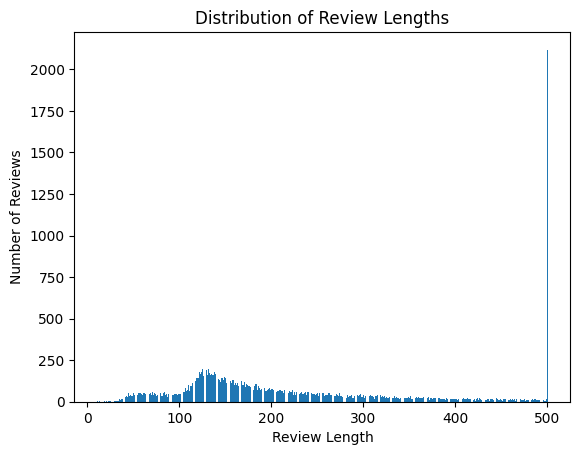

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 計算評論的單詞數
review_lengths = [min(len(review), 500) for review in X_train]

# 建立長度分佈
length_distribution = {}
for length in review_lengths:
    length_distribution[length] = length_distribution.get(length, 0) + 1

# 計算平均值、標準差等統計信息
mean_length = np.mean(review_lengths)
std_length = np.std(review_lengths)
max_length = np.max(review_lengths)
min_length = np.min(review_lengths)

# 打印統計信息
print("Mean Length:", mean_length)
print("Standard Deviation:", std_length)
print("Maximum Length:", max_length)
print("Minimum Length:", min_length)

# 可視化分佈
plt.bar(length_distribution.keys(), length_distribution.values())
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

In [7]:
#Segementing the Dataset
#Define the threshold
threshold_length =222

idx_short = [i for i, review in enumerate(X_train) if len(review) <= threshold_length]
idx_long = [i for i, review in enumerate(X_train) if len(review) > threshold_length]

In [8]:
#Prepare the short and long subsets
X_short = [X_train[i] for i in idx_short]
y_short = [y_train[i] for i in idx_short]

X_long = [X_train[i] for i in idx_long]
y_long = [y_train[i] for i in idx_long]

#Pad the sequences
X_short_padded = pad_sequences(X_short, maxlen=threshold_length, padding='post')
X_long_padded = pad_sequences(X_long, maxlen=threshold_length, padding='post')

In [9]:
#Print the number of data for X_short and X_long and their corresponding labels
print('Number of short reviews:', len(X_short))
print('Number of long reviews:', len(X_long))
print('Number of short labels:', len(y_short))
print('Number of long labels:', len(y_long))

Number of short reviews: 15727
Number of long reviews: 9273
Number of short labels: 15727
Number of long labels: 9273


padding post

In [10]:
#print the 整數序列長度 of X_short_padded
print('Short review length:', len(X_short_padded[0]))
print('Long review length:', len(X_long_padded[0]))
print('Label:', y_short[0])
print('Label:', y_long[0])

Short review length: 222
Long review length: 222
Label: 1
Label: 1


In [11]:
#Check for the short review
decoded_review = ''.join([index_word.get(i,'?') for i in X_short [0]])
print('Review(Decoded)')
print(decoded_review)

Review(Decoded)
<START>thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandthefly<UNK>wasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittle<UNK>thatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabig<UNK>forthewholefilmbutthesechildrenareamazingandshouldbe<UNK>forwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwas<UNK>withusall


In [12]:
#Check for the long review
decoded_review = ''.join([index_word.get(i,'?') for i in X_long [0]])
print('Review(Decoded)')
print(decoded_review)

Review(Decoded)
<START>the<UNK><UNK>atstorytellingthetraditionalsortmanyyearsaftertheeventicanstillseeinmy<UNK>eyeanelderlyladymy<UNK>mother<UNK>thebattleof<UNK>shemakesthecharacterscomealiveherpassionisthatofaneyewitnessonetotheeventsonthe<UNK><UNK>amileorsofromwhereshelivesbrbrofcourseithappenedmanyyearsbeforeshewasbornbutyouwouldn'tguessfromthewayshetellsitthesamestoryistoldin<UNK>thelengthand<UNK>of<UNK>asi<UNK>itwithafriendonenightin<UNK>alocalcutintogivehisversionthediscussioncontinuedtoclosingtimebrbrstoriespasseddownlikethisbecomepartofourbeingwhodoesn'trememberthestoriesourparentstolduswhenwewerechildrentheybecomeourinvisibleworldandaswegrowoldertheymaybestillserveasinspirationorasanemotional<UNK>factandfictionblendwith<UNK>rolemodelswarningstories<UNK>magicandmysterybrbrmynameis<UNK>likemygrandfatherandhisgrandfatherbeforehimourprotagonistintroduceshimselftousandalsointroducesthestorythat<UNK>backthrough<UNK>it<UNK>storieswithinstoriesstoriesthat<UNK>the<UNK>wonderof<UNK>its<

In [13]:
#CNN Model training for all reviews
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

#Define the model
#Build a CNN model using 10000 neurons, make sure to rely mostly on convolutional layers
model = Sequential()
model.add(Embedding(5000, 100, input_length=max_length))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model Summary
model.summary()

#Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

#Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)
#CNN Model training for all reviews
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          500000    
                                                                 
 conv1d (Conv1D)             (None, 498, 256)          77056     
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 610081 (2.33 MB)
Trainable params: 610081 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [18]:
#RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, SimpleRNN, Dense, Reshape

model_rnn = Sequential()
model_rnn.add(Embedding(5000, 100, input_length=max_length))
model_rnn.add(Conv1D(256, 3, padding='valid', activation='relu'))
model_rnn.add(GlobalMaxPooling1D())
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Reshape((-1, 128)))  # Reshape the input to make it compatible with SimpleRNN layer
model_rnn.add(SimpleRNN(128, activation='tanh'))  # You can adjust the number of units in the SimpleRNN layer as needed
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.summary()

model_rnn.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

loss, accuracy = model_rnn.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 100)          500000    
                                                                 
 conv1d_5 (Conv1D)           (None, 498, 256)          77056     
                                                                 
 global_max_pooling1d_5 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 reshape_1 (Reshape)         (None, 1, 128)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                      

In [16]:
#GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, GRU, Reshape

# Define the model
model = Sequential()
model.add(Embedding(5000, 100, input_length=max_length))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Reshape((-1, 128)))  # Reshape the input to make it compatible with GRU layer
model.add(GRU(128))  # You can adjust the number of units in the GRU layer as needed
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 100)          500000    
                                                                 
 conv1d_3 (Conv1D)           (None, 498, 256)          77056     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 reshape (Reshape)           (None, 1, 128)            0         
                                                                 
 gru_2 (GRU)                 (None, 128)               99072     
                                                      

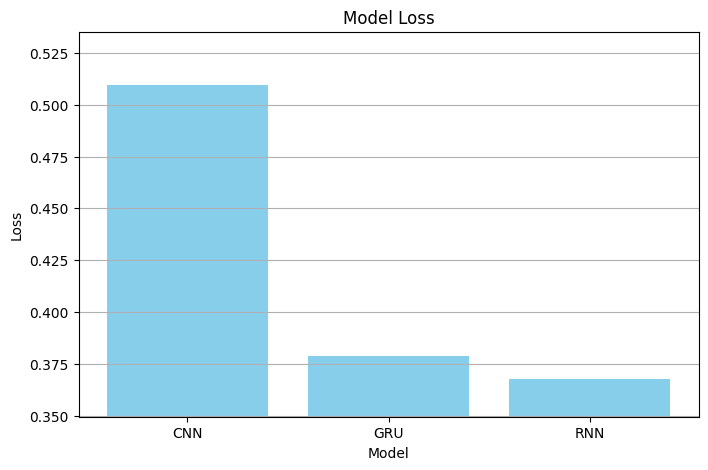

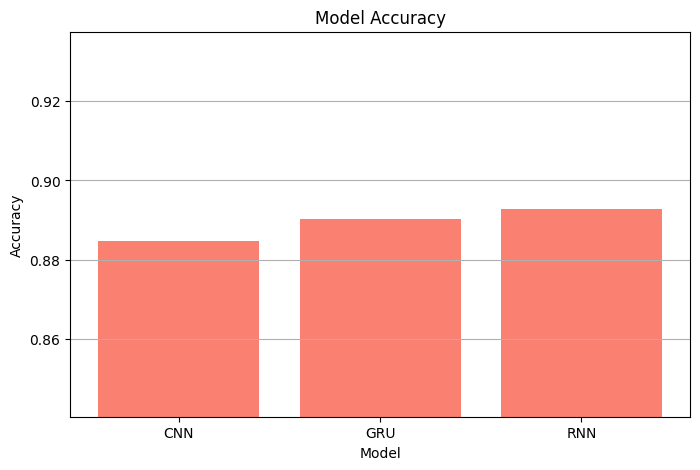

padding pre

In [19]:
#Prepare the short and long subsets
X_short = [X_train[i] for i in idx_short]
y_short = [y_train[i] for i in idx_short]

X_long = [X_train[i] for i in idx_long]
y_long = [y_train[i] for i in idx_long]

#Pad the sequences
X_short_padded = pad_sequences(X_short, maxlen=threshold_length, padding='pre')
X_long_padded = pad_sequences(X_long, maxlen=threshold_length, padding='pre')

In [20]:
#CNN Model training for all reviews
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

#Define the model
#Build a CNN model using 10000 neurons, make sure to rely mostly on convolutional layers
model = Sequential()
model.add(Embedding(5000, 100, input_length=max_length))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model Summary
model.summary()

#Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

#Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)
#CNN Model training for all reviews
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 100)          500000    
                                                                 
 conv1d_6 (Conv1D)           (None, 498, 256)          77056     
                                                                 
 global_max_pooling1d_6 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 610081 (2.33 MB)
Trainable params: 610081 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [21]:
#GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, GRU, Reshape

# Define the model
model = Sequential()
model.add(Embedding(5000, 100, input_length=max_length))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Reshape((-1, 128)))  # Reshape the input to make it compatible with GRU layer
model.add(GRU(128))  # You can adjust the number of units in the GRU layer as needed
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 100)          500000    
                                                                 
 conv1d_7 (Conv1D)           (None, 498, 256)          77056     
                                                                 
 global_max_pooling1d_7 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 reshape_2 (Reshape)         (None, 1, 128)            0         
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                      

In [24]:
#RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, SimpleRNN, Dense, Reshape

model_rnn = Sequential()
model_rnn.add(Embedding(5000, 100, input_length=max_length))
model_rnn.add(Conv1D(256, 3, padding='valid', activation='relu'))
model_rnn.add(GlobalMaxPooling1D())
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Reshape((-1, 128)))  # Reshape the input to make it compatible with SimpleRNN layer
model_rnn.add(SimpleRNN(128, activation='tanh'))  # You can adjust the number of units in the SimpleRNN layer as needed
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.summary()

model_rnn.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

loss, accuracy = model_rnn.evaluate(X_test_padded, y_test)
print('Test Accuracy:', accuracy)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 100)          500000    
                                                                 
 conv1d_10 (Conv1D)          (None, 498, 256)          77056     
                                                                 
 global_max_pooling1d_10 (G  (None, 256)               0         
 lobalMaxPooling1D)                                              
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 reshape_4 (Reshape)         (None, 1, 128)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 128)               32896     
                                                     

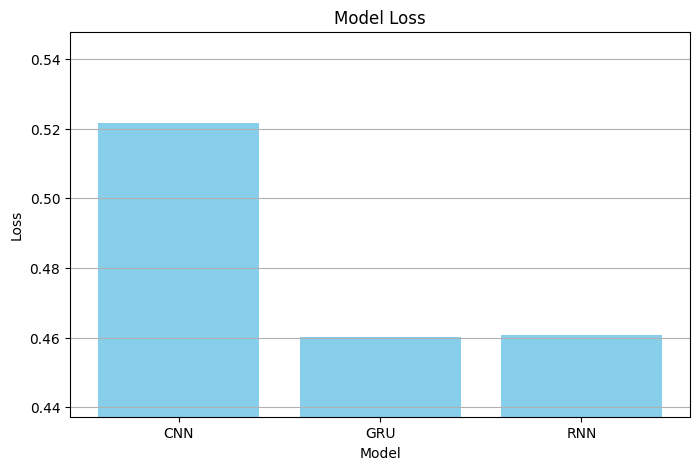

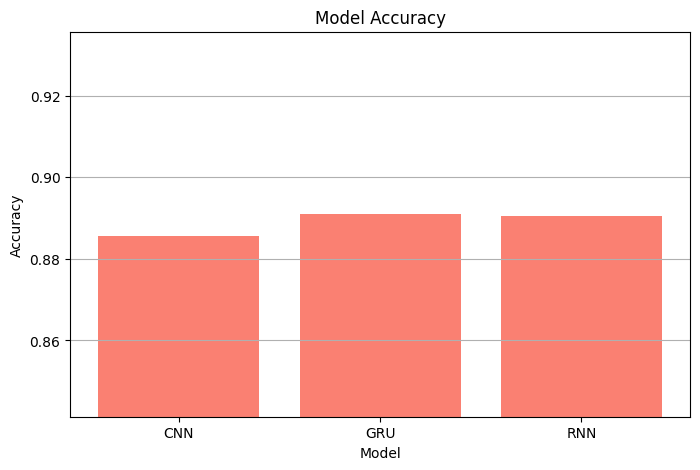

In [30]:
import matplotlib.pyplot as plt

model_names = ['CNN', 'GRU', 'RNN']
loss_values = [0.5217, 0.4603, 0.4606]
accuracy_values = [0.8856, 0.8911, 0.8906]

plt.figure(figsize=(8, 5))
plt.bar(model_names, loss_values, color='skyblue')
plt.title('Model Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
min_loss = min(loss_values)
max_loss = max(loss_values)
plt.ylim(min_loss * 0.95 , max_loss * 1.05)
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_values, color='salmon')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
min_loss = min(accuracy_values)
max_loss = max(accuracy_values)
plt.ylim(min_loss * 0.95 , max_loss * 1.05)
plt.grid(axis='y')
plt.show()


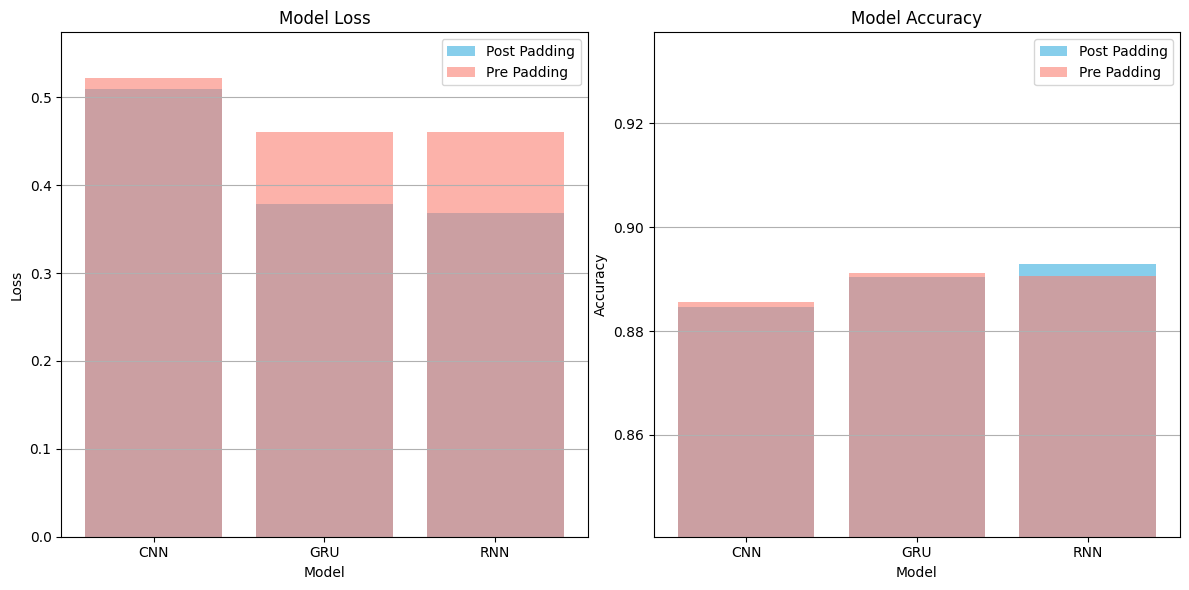

In [33]:
import matplotlib.pyplot as plt

model_names = ['CNN', 'GRU', 'RNN']

# Post填充方式
loss_values_post = [0.5098, 0.3786, 0.3678]
accuracy_values_post = [0.8846, 0.8904, 0.8929]

# Pre填充方式
loss_values_pre = [0.5217, 0.4603, 0.4606]
accuracy_values_pre = [0.8856, 0.8911, 0.8906]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(model_names, loss_values_post, color='skyblue', label='Post Padding')
plt.bar(model_names, loss_values_pre, color='salmon', label='Pre Padding', alpha=0.6)
plt.title('Model Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.ylim(0, max(max(loss_values_post), max(loss_values_pre)) * 1.1)
plt.grid(axis='y')
plt.legend()


plt.subplot(1, 2, 2)
plt.bar(model_names, accuracy_values_post, color='skyblue', label='Post Padding')
plt.bar(model_names, accuracy_values_pre, color='salmon', label='Pre Padding', alpha=0.6)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
plt.ylim(min(accuracy_values_post + accuracy_values_pre) * 0.95 , max(accuracy_values_post + accuracy_values_pre) * 1.05)
plt.show()
